# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df.query('group == "treatment" and landing_page != "new_page"').user_id.nunique()

1965

In [8]:
df.query('group == "control" and landing_page != "old_page"').user_id.nunique()

1928

**f.** Do any of the rows have missing values?

In [9]:
df.isna().sum()[0]

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


**a.** Now create a new dataset that does not contain those misleading rows. Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query('group == "control" and landing_page != "old_page"').index);
df2 = df2.drop(df2.query('group == "treatment" and landing_page != "new_page"').index);
df2.shape[0]

290585

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset = ['user_id'], keep = 'last', inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
#Checking the removal of the duplicated user_id
df2.shape[0]

290584

### ToDo 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [17]:
population_conversion = df2.converted.mean()
population_conversion

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control_conversion = df2.query('group == "control"').converted.mean()
control_conversion

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment_conversion = df2.query('group == "treatment"').converted.mean()
treatment_conversion

0.11880806551510564

In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_conversion - control_conversion
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [21]:
df2[df2['landing_page'] == 'new_page'].count()[0]/df2.shape[0]

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

"According to the conversion rates calculated for both control and treatment group we notice that the control group had slightly higher conversion rates which might suggest that the old_page might be better that the new_page."

<a id='ab_test'></a>
## Part II - A/B Test
  

### ToDo 2.1
Now, consider you need to make the decision just based on all the data provided.  
 
If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

                                                𝐻0: 𝑝𝑛𝑒𝑤 =< 𝑝𝑜𝑙𝑑
                                                𝐻1: 𝑝𝑛𝑒𝑤 > 𝑝𝑜𝑙𝑑

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
population_conversion = df2.converted.mean()
new_page_conversion = population_conversion
new_page_conversion

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
population_conversion = df2.converted.mean()
old_page_conversion = population_conversion
old_page_conversion

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [24]:
treatment_count = df2.query('group == "treatment" and landing_page == "new_page"').user_id.nunique()
treatment_count

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
control_count = df2.query('group == "control" and landing_page == "old_page"').user_id.nunique()
control_count

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], treatment_count, p= [1 - new_page_conversion, new_page_conversion])
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
#calculating the probability for the simulated new_page_conversions
new_prob_sample = (new_page_converted == 1).mean()
new_prob_sample

0.12125800013763678

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [28]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], control_count, p= [1 - old_page_conversion, old_page_conversion])
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
#calculating the probability for the simulated new_page_conversions
old_prob_sample = (old_page_converted == 1).mean()
old_prob_sample

0.11964288172694357

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [30]:
prob_diff = new_prob_sample - old_prob_sample
prob_diff

0.0016151184106932143


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted_sample = np.random.choice([0, 1], treatment_count, replace = True, p= [1 - new_page_conversion, new_page_conversion])
    new_page_converted_sample_mean = (new_page_converted_sample == 1).mean()
    old_page_converted_sample = np.random.choice([0, 1], control_count, replace = True, p= [1 - old_page_conversion, old_page_conversion])
    old_page_converted_sample_mean = (old_page_converted_sample == 1).mean()
    difference = new_page_converted_sample_mean - old_page_converted_sample_mean
    p_diffs.append(difference)
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00209003,  0.00087906,  0.00209024, ..., -0.00053887,
        0.00078931, -0.00148229])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


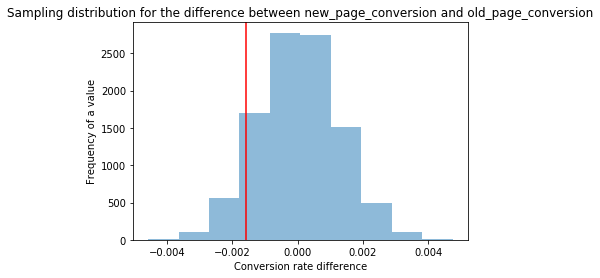

In [32]:
plt.hist(p_diffs, alpha= 0.5);
plt.xlabel('Conversion rate difference');
plt.ylabel('Frequency of a value');
plt.title('Sampling distribution for the difference between new_page_conversion and old_page_conversion');
plt.axvline(obs_diff, c='red')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [33]:
#calculating the standard deviation for the p_diffs
p_diffs.std()

0.0012227151213396799

In [35]:
#create a random sample for the null values
null_vals = np.random.normal(0, p_diffs.std(), 10000)
null_vals

array([-0.00064546, -0.00016047,  0.00061051, ...,  0.00028407,
       -0.00069107, -0.00040382])

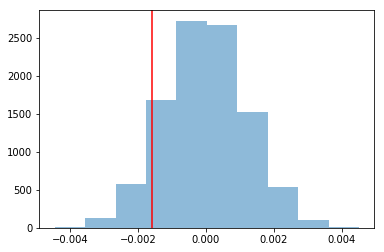

In [36]:
#Plot the null values
plt.hist(null_vals, alpha= 0.5)
plt.axvline(obs_diff, c='red')

In [37]:
#calculating the p_value
p_value = (null_vals > obs_diff).mean()
p_value

0.90139999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?             
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

"The calculated value is called the 'p_value'."

"Comparing this value with type I error rate suggests that we fail to reject the null hypothesis since the p_value is larger than the type I error rate." 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0];

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0];

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"').count()[0];

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"').count()[0];

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.
 
The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 
 
Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.


In [39]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative= 'larger')
print(z_score, p_value)

1.31092419842 0.094941687241


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


"Based on the z_score we calculated when we compare it to the critical value at 95% we find that the calculated z_score is smaller the the critical value for a right_tailed test which suggests that we fail to reject the null hypothesis, also when we compare the p_value to type I error rate we find that the p_value is larger than the type I error rate which also suggests the same as the z_score value."

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

 "logistic regression"

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [40]:
df2['intercept'] = 1
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,a_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [41]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-20 09:43 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [43]:
#exponentiating the coefficients values and taking the reciprocal of the values
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


"The model here suggests that the null hypothesis states that new_page is less than or equal to old_page in terms of conversion rates and the alternative hypothesis suggests that new_page is higher than old_page in terms of conversion rates.
Comparing the p_value of ab_page to type I error rate suggests that conversion rates according to ab_page are statistically significant and we fail to reject the null hypothesis, but practically it does not make much of a difference."

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

"Here when we compared the conversion rates based on old_page and new_page we found that there was a minor difference between the two pages which might appear statistically significant but practically it may not have much of a difference, so it was important to see if there might be other factors that might affect the conversion rates."

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [44]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
# Join with the df2 dataframe
df_merged = df2.set_index('user_id').join(countries_df.set_index('user_id'))
df_merged.head()

,timestamp,group,landing_page,converted,intercept,a_page,ab_page,country
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [52]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head(10)

,timestamp,group,landing_page,converted,intercept,a_page,ab_page,country,US,UK,CA
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,1,0,0
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,US,1,0,0
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,0,0,1
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,US,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


In [53]:
# Fit your model, and summarize the results
log_mod_coun = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK']])
result_coun = log_mod_coun.fit()
result_coun.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-20 09:56 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [54]:
1/np.exp(result_coun.params)

intercept    7.614303
ab_page      1.015056
US           0.960062
UK           0.950621
dtype: float64

"When we compare the p_value of our variables to the type I error rate we find that they are larger than the error rate which suggests that our variables are statistically significant and hence we fail to reject the null hypothesis. But practically we also find that the country variable has less impact on the conversion rate."

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])